<a href="https://colab.research.google.com/github/madarasw/ML_Advanced_Learning_Algorithms/blob/main/Week1/CoffeeRoasting_NN_with_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal:

build a small neural network using Tensorflow.

In [18]:
# mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

# Add folder to Python path
sys.path.append("/content/drive/MyDrive/Colab Notebooks/Course 2/Week 1")

# Apply style
plt.style.use('/content/drive/MyDrive/Colab Notebooks/Course 2/Week 1/deeplearning.mplstyle')

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [21]:
# Data set

X,Y = load_coffee_data();
print(X.shape, Y.shape)

(200, 2) (200, 1)


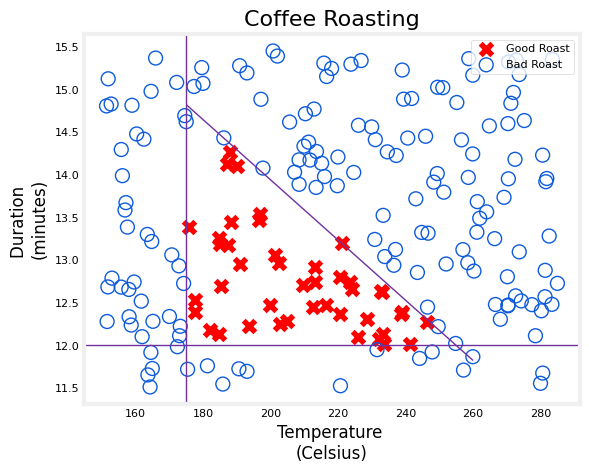

In [22]:
plt_roast(X,Y)

### Normalize Data
Fitting the weights to the data (back-propagation, covered in next week's lectures) will proceed more quickly if the data is normalized. This is the same procedure you used in Course 1 where features in the data are each normalized to have a similar range.
The procedure below uses a Keras [normalization layer](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/). It has the following steps:
- create a "Normalization Layer". Note, as applied here, this is not a layer in your model.
- 'adapt' the data. This learns the mean and variance of the data set and saves the values internally.
- normalize the data.  
It is important to apply normalization to any future data that utilizes the learned model.

In [23]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [26]:
# Tile/copy our data to increase the training set size and reduce the number of training epochs.
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [12]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        tf.keras.Input(shape=(2,)),
        Dense(3, activation='sigmoid', name = 'layer1'),
        Dense(1, activation='sigmoid', name = 'layer2')
     ]
)

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
L1_num_params = 2 * 3 + 3   # W1 parameters  + b1 parameters
L2_num_params = 3 * 1 + 1   # W2 parameters  + b2 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params  )

L1 params =  9 , L2 params =  4


In [15]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.8   0.19  0.98]
 [ 0.04  0.35 -0.67]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.85]
 [-0.13]
 [ 0.28]] 
b2(1,): [0.]


In [16]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.2794
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.1238
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.1004
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0231
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0139
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0097
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.0070
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0051
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0037
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0027


In [27]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 1.26e+01  1.46e+01  4.26e-03]
 [ 2.76e-01  1.22e+01 -9.03e+00]] 
b1: [ 13.24   1.84 -11.3 ]
W2:
 [[ 38.56]
 [-42.58]
 [-45.27]] 
b2: [-12.49]


In [28]:
# After finishing the lab later, you can re-run all
# cells except this one to see if your trained model
# gets the same results.

# Set weights from a previous run.
W1 = np.array([
    [-8.94,  0.29, 12.89],
    [-0.17, -7.34, 10.79]] )
b1 = np.array([-9.87, -9.28,  1.01])
W2 = np.array([
    [-31.38],
    [-27.86],
    [-32.79]])
b2 = np.array([15.54])

# Replace the weights from your trained model with
# the values above.
model.get_layer("layer1").set_weights([W1,b1])
model.get_layer("layer2").set_weights([W2,b2])

In [29]:
# Check if the weights are successfully replaced
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-8.94  0.29 12.89]
 [-0.17 -7.34 10.79]] 
b1: [-9.87 -9.28  1.01]
W2:
 [[-31.38]
 [-27.86]
 [-32.79]] 
b2: [15.54]


In [30]:
X_test = np.array([
    [200,13.9],  # positive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
predictions = 
 [[9.63e-01]
 [3.03e-08]]


In [31]:
yhat = np.zeros_like(predictions)
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        yhat[i] = 1
    else:
        yhat[i] = 0
print(f"decisions = \n{yhat}")

decisions = 
[[1.]
 [0.]]


In [32]:
yhat = (predictions >= 0.5).astype(int)
print(f"decisions = \n{yhat}")

decisions = 
[[1]
 [0]]


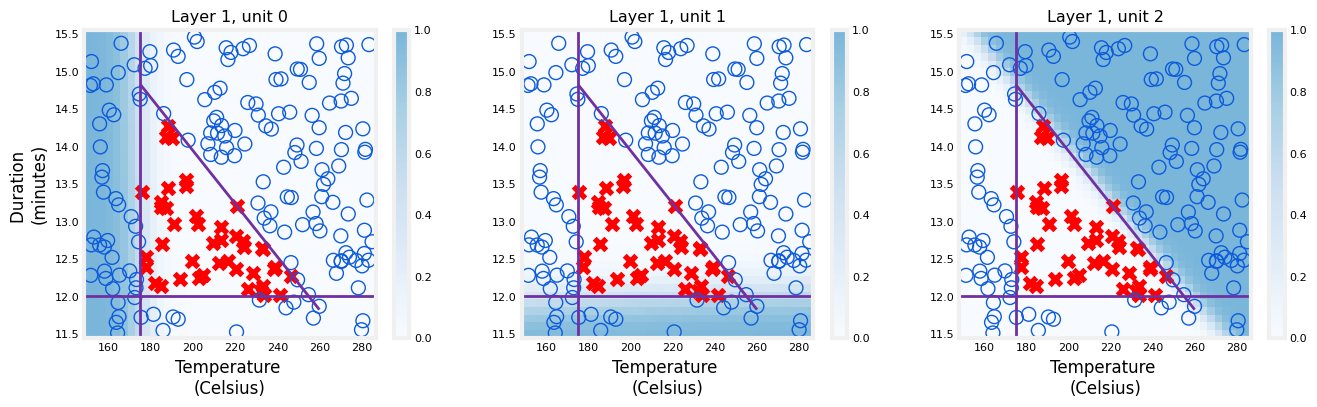

In [33]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

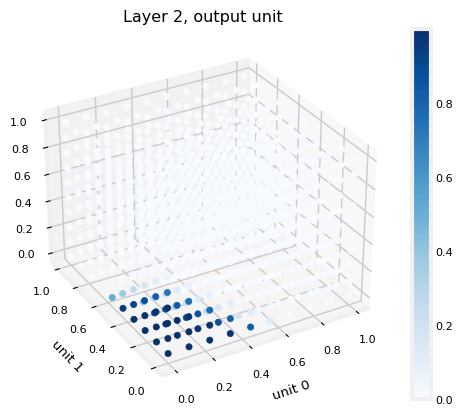

In [34]:
plt_output_unit(W2,b2)

In [ ]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)

Yay!